# EPot Model
This notebook studies the effect of non-uniform bias field in the detector.

There is not yet a working COMSOL model of the 100mm HV detectors. As a stand-in, I made a basic detector geometry in COMSOL with the correct detector dimensions and a cylindrical housing.

In [1]:
exec(open("nb_setup.py").read())
from constants import *

../mplstyles
3.1.1
/data/chocula/mast/cdms/analysis/run068/R68_paper2019/mplstyles


In [2]:
import pandas as pd

names=['x', 'y', 'z', 'V', 'Ex', 'Ey', 'Ez']
#data=np.loadtxt('data/basic_det_E_field', skiprows=9)
#data=np.loadtxt('data/basic_det_slice_data.txt', skiprows=9)
data=np.loadtxt('data/basic_det_slice_data_fine_thick_elec.txt', skiprows=9)
data

array([[ 0.00000000e+00,  1.18616814e+00,  1.89079397e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.19992535e+00,  1.85000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.93889390e-18,  1.15736963e+00,  1.85000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 6.93889390e-18,  4.89978387e+00,  1.54831447e+00, ...,
         4.30641422e+01, -4.69304262e+03,  1.51412794e+04],
       [ 3.46944695e-18,  4.88313337e+00,  1.59662651e+00, ...,
        -1.60345434e+00, -2.83438605e+03,  1.59450757e+04],
       [ 0.00000000e+00,  4.82847558e+00,  1.54393361e+00, ...,
         7.14145799e+00, -3.09071466e+03,  1.28772608e+04]])

In [3]:
#COMSOL mesh values
x_all=data[:,0]
y_all=data[:,1]
z_all=data[:,2]
V_all=data[:,3]
Ex_all=data[:,4]
Ey_all=data[:,5]
Ez_all=data[:,6]

#Many are at dumplicate y,z points which cause issues later
#c_unique=np.unique(np.array([[x_all],[y_all]]).T,return_index=True, axis=0)[1]

#x_uni=x_all[c_unique]
#y_uni=y_all[c_unique]
#z_uni=z_all[c_unique]
#V_uni=V_all[c_unique]
#Ex_uni=Ex_all[c_unique]
#Ey_uni=Ey_all[c_unique]
#Ez_uni=Ez_all[c_unique]

In [4]:
#Detector dimensions
R=5 #[cm]
h=3.3 #[cm]

inr=(x_all**2+y_all**2<R**2)
inz=(np.abs(z_all)<h/2)
indet=inr & inz

r=np.sqrt(y_all**2+z_all**2)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


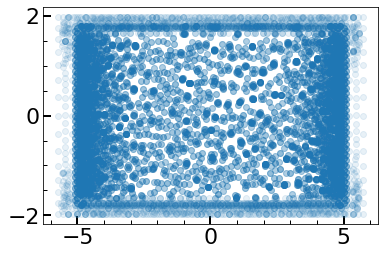

In [5]:
#The mesh points are far from uniform. We want to sample the volume unifomly
plt.plot(y_all,z_all,'o', alpha=0.1)

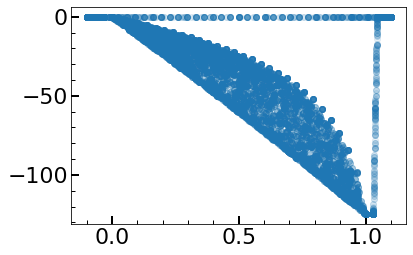

In [6]:
plt.plot(z_all/h+0.5,V_all,'o', alpha=0.1)

In [7]:
from scipy.interpolate import NearestNDInterpolator, LinearNDInterpolator

In [8]:
#Uniform grid

#Interpolate uniformly in the y-z plane
#yi=np.linspace(-R,R,1000)
#zi=np.linspace(-h/2,h/2,1000)
delta=0.01 #[cm]

yi=np.arange(-R,R,delta)
zi=np.arange(-h/2,h/2,delta)

Yi, Zi = np.meshgrid(yi, zi)

interp_V = LinearNDInterpolator(np.vstack((np.ravel(y_all), np.ravel(z_all))).T, np.ravel(V_all))
Vi=interp_V(Yi,Zi)

interp_Ey = LinearNDInterpolator(np.vstack((np.ravel(y_all), np.ravel(z_all))).T, np.ravel(Ey_all))
Eyi=interp_Ey(Yi,Zi)

interp_Ez = LinearNDInterpolator(np.vstack((np.ravel(y_all), np.ravel(z_all))).T, np.ravel(Ez_all))
Ezi=interp_Ez(Yi,Zi)

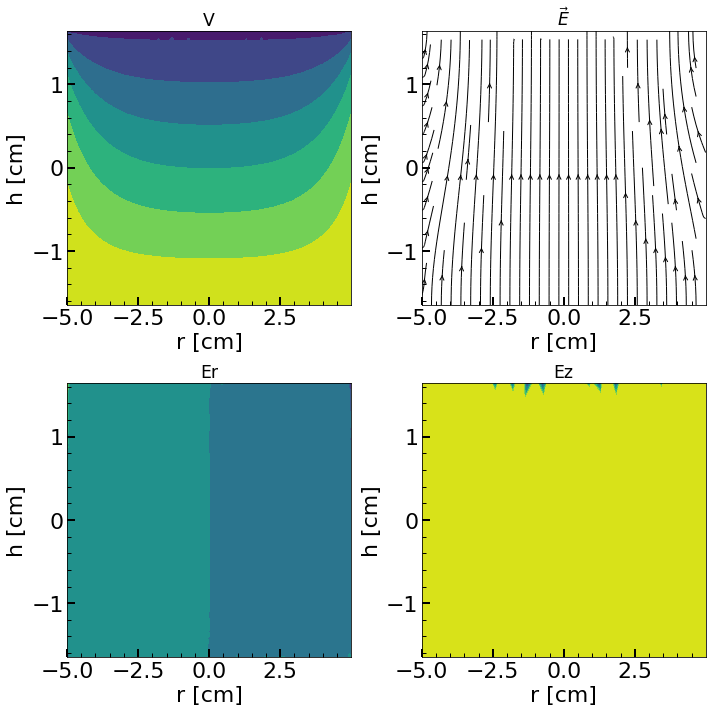

In [17]:
fig, ax = plt.subplots(2,2,figsize=(10, 10))
#ax[0,0].plot(z,V,'o',alpha=0.1)
#ax[0,1].plot(np.ravel(Zi),np.ravel(Vi),'o',alpha=0.1)
#ax[1,0].plot(np.ravel(Yi),np.ravel(Zi),'o',alpha=0.1)

ax[0,0].set_title('V', fontsize='xx-large')
ax[0,0].contourf(Yi,Zi,Vi)

ax[0,1].set_title(r'$\vec{E}$', fontsize='xx-large')
ax[0,1].streamplot(Yi,Zi,Eyi,Ezi, color='k', linewidth=1, density=1, arrowstyle='->')

ax[1,0].set_title('Er', fontsize='xx-large')
ax[1,0].contourf(Yi,Zi,Eyi)

ax[1,1].set_title('Ez', fontsize='xx-large')
a11=ax[1,1].contourf(Yi,Zi,Ezi)

for axi in np.ravel(ax):
    axi.set_xlabel('r [cm]')
    axi.set_ylabel('h [cm]')
#fig.colorbar(a11)

plt.tight_layout()
plt.savefig('figures/V_model.png')

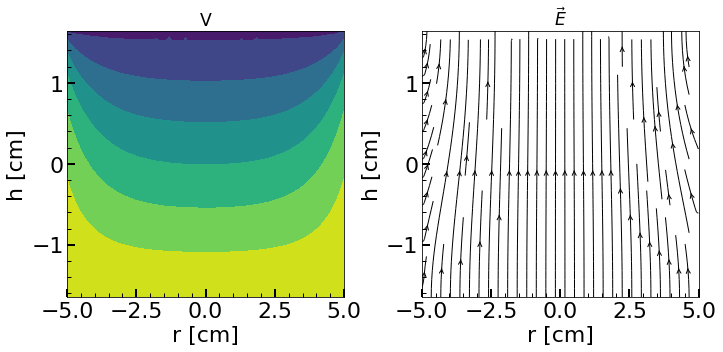

In [23]:
#Just the top two plots
fig, ax = plt.subplots(1,2,figsize=(10, 5))

ax[0].set_title('V', fontsize='xx-large')
ax[0].contourf(Yi,Zi,Vi)

ax[1].set_title(r'$\vec{E}$', fontsize='xx-large')
ax[1].streamplot(Yi,Zi,Eyi,Ezi, color='k', linewidth=1, density=1, arrowstyle='->')

for axi in np.ravel(ax):
    axi.set_xlabel('r [cm]')
    axi.set_xlim(-5,5)
    axi.set_ylabel('h [cm]')
#fig.colorbar(a11)

plt.tight_layout()
plt.savefig('figures/V_model_V_E_only.png')

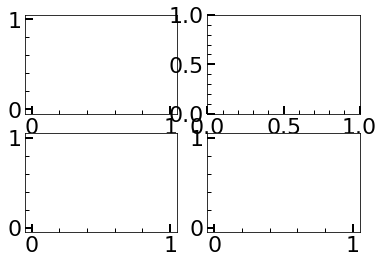

In [18]:
#Where did it fail?
fig, ax = plt.subplots(2,2)
ax[0,0].plot(Yi[np.isnan(Vi)],Zi[np.isnan(Vi)],'o')
ax[1,0].plot(Yi[np.isnan(Vi)],Zi[np.isnan(Eyi)],'o')
ax[1,1].plot(Yi[np.isnan(Vi)],Zi[np.isnan(Ezi)],'o')

In [10]:
#We have the potential map, but that doesn't tell us what NTL gain the carriers experience.
#We'd need to model the event to get that.
#Let's try a poor man's version and just assume the carrier goes straight in the direction of the local field.
#Then we check the difference in potentials when the carriers hit the edge.

#Check for intersection with each detector edge
Left=Ezi/Eyi*(-R-Yi)+Zi#Left
Right=Ezi/Eyi*(R-Yi)+Zi#Right
Top=Eyi/Ezi*(h/2-Zi)+Yi#Top
Bottom=Eyi/Ezi*(-h/2-Zi)+Yi#Bottom

In [23]:
dVi=np.zeros_like(Yi)

In [24]:
fudge=0.99
for i in np.arange(Yi.shape[0]):
    for j in np.arange(Yi.shape[1]):
        left=Left[i,j]
        right=Right[i,j]
        top=Top[i,j]
        bottom=Bottom[i,j]
        v=0
        
        nedge=0

        if(-fudge*h/2<left<fudge*h/2):
            nedge+=1
            v+=interp_V(-R,left)

        if(-fudge*h/2<right<fudge*h/2):
            nedge+=1
            if (nedge==1):
                v+=interp_V(R,right)
            elif(nedge==2):
                v-=interp_V(R,right)

        if(-fudge*R<top<fudge*R):
            nedge+=1
            if (nedge==1):
                #v+=interp_V(top,h/2)
                v+=-125
            elif(nedge==2):
                #v-=interp_V(top,h/2)
                v-=-125

        if(-fudge*R<bottom<fudge*R):
            nedge+=1
            if (nedge==1):
                #v+=interp_V(bottom,-h/2)
                v+=0
            elif(nedge==2):
                #v-=interp_V(bottom,-h/2)
                v-=0

        if(nedge!=2):
            v=-100000+nedge
            
        dVi[i,j]=v

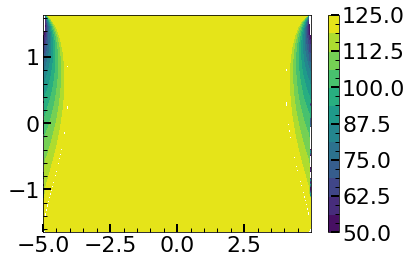

In [25]:
plt.contourf(Yi,Zi,np.abs(dVi),np.linspace(50,125,13))
plt.colorbar()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


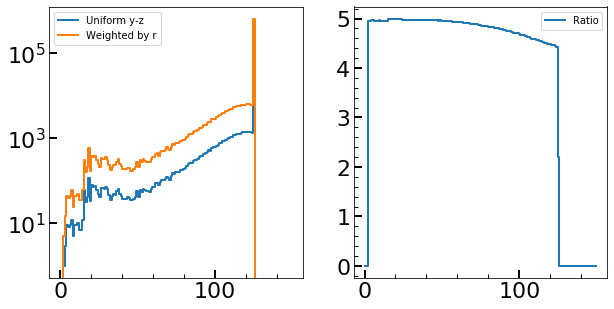

In [26]:
fig,ax = plt.subplots(1,2, figsize=(10, 5))
bins=np.linspace(0,150,150)
bctr=(bins[:-1]+bins[1:])/2

hflat,_=np.histogram(np.abs(np.ravel(dVi)),bins=bins)
hvol,_=np.histogram(np.abs(np.ravel(dVi)),weights=np.abs(np.ravel(Yi)),bins=bins)

ax[0].step(bctr,hflat,label='Uniform y-z', where='mid');
ax[0].step(bctr,hvol,label='Weighted by r', where='mid');
ax[0].set_yscale('log')
ax[0].legend()

ratio=np.zeros_like(hvol)
ratio[hflat!=0]=hvol[hflat!=0]/hflat[hflat!=0]
ax[1].step(bctr,ratio,label='Ratio', where='mid');
ax[1].legend()

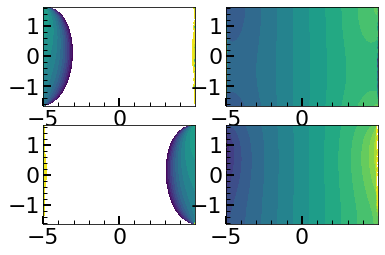

In [27]:
fig, ax = plt.subplots(2,2)
ax[0,0].contourf(Yi,Zi,Left,np.linspace(-10,10,20))
ax[1,0].contourf(Yi,Zi,Right,np.linspace(-10,10,20))
ax[0,1].contourf(Yi,Zi,Top,np.linspace(-10,10,20))
ax[1,1].contourf(Yi,Zi,Bottom,np.linspace(-10,10,20))

#fig.colorbar()

# Better Transport Model
Not sure how good of a model we used for charge propagation.
The next best thing would be to follow the field lines from initial position to where they hit the edge.

Following example here:
https://pythonmatplotlibtips.blogspot.com/2017/12/draw-beautiful-electric-field-lines.html

In [28]:
#t: time step
#y: position, (y,z)
def E_dir(t, y):
    Ey=interp_Ey(y[0],y[1])
    Ez=interp_Ez(y[0],y[1])
    
    n=np.sqrt(Ey**2+Ez**2)
    return [Ey/n, Ez/n]

#Are we still in the detector?
def in_Det(y,z):
    return ((np.abs(y)<R) & (np.abs(z)<h/2))

def progress(f):
    sys.stdout.write("%d%%   \r" % (f) )
    sys.stdout.flush()

In [29]:
from scipy.integrate import ode as ode

dt=0.1
tmax=10

#List of all paths taken
ys_up=[]
zs_up=[]
ys_down=[]
zs_down=[]

delta=0.1 #[cm]
yi_ode=np.arange(0,R,delta)
zi_ode=np.arange(-h/2,h/2,delta)

Yi_ode, Zi_ode = np.meshgrid(yi_ode, zi_ode)

Yi_ode=np.ravel(Yi_ode)
Zi_ode=np.ravel(Zi_ode)

In [ ]:
################################################
####ONLY RUN THIS IF YOU'RE WILLING TO WAIT#####
################################################
#Otherwise skip to the next cell and load a previously run version

#for yi in np.arange(-R,R,R/10):
#    print(yi/R)
#    for zi in np.arange(-h/2,h/2,h/2/10):
for i,(yi,zi) in enumerate(zip(Yi_ode,Zi_ode)):
        #hole
        r=ode(E_dir)
        r.set_integrator('vode')
        y=[ yi ]
        z=[ zi ]
        r.set_initial_value([y[0], z[0]], 0)

        while r.successful() and r.t<tmax:
            r.integrate(r.t+dt)
            y.append(r.y[0])
            z.append(r.y[1])

        ys_up.append(y)
        zs_up.append(z)

        #electron
        r=ode(E_dir)
        r.set_integrator('vode')
        y=[ yi ]
        z=[ zi ]
        r.set_initial_value([y[0], z[0]], 0)

        while r.successful() and r.t<tmax and in_Det(r.y[0],r.y[1]):
            r.integrate(r.t-dt)
            y.append(r.y[0])
            z.append(r.y[1])

        ys_down.append(y)
        zs_down.append(z)
        
        progress(100*(i+1)/len(Yi_ode))

In [30]:
#Save/load these paths, they take forever to compute
import pickle as pkl

#action='save'
action='load'

fname='data/EPot_Model_paths_v1.pkl'

if action=='save':
    ifile = 0
    fname='data/EPot_Model_paths_v{0}.pkl'.format(ifile+1)
    while os.path.exists(fname):
        ifile += 1
        fname='data/EPot_Model_paths_v{0}.pkl'.format(ifile+1)
        
    saveFile = open(fname, 'wb')
    results={'delta':delta,'ys_up':ys_up, 'zs_up':zs_up, 'ys_down':ys_down, 'zs_down':zs_down}
    pkl.dump(results,saveFile)
    saveFile.close()
    
elif action=='load':
    results=pkl.load(open(fname,'rb'))
    delta=results['delta']
    ys_up=results['ys_up']
    ys_down=results['ys_down']
    zs_up=results['zs_up']
    zs_down=results['zs_down']

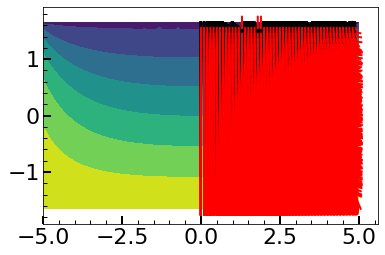

In [31]:
fig, ax = plt.subplots()
ax.contourf(Yi,Zi,Vi)
for y,z in zip(ys_up,zs_up):
    ax.plot(y,z,'-k')

for y,z in zip(ys_down,zs_down):
    ax.plot(y,z,'-r')

In [32]:
#Some guys get stuck near the top
#Let's clean up the results a bit by pushing endpoints to the nearest edge

def nearest_edge_point(y,z):
    edge_points=np.array([[-R,z],[R,z],[y,h/2],[y,-h/2]])#left,right,top,bottom
    ds=np.sum(np.sqrt((edge_points-np.array([y,z]))**2),axis=1)
    return edge_points[np.argmin(ds)]

In [33]:
ys_up_end=[]
zs_up_end=[]
ys_down_end=[]
zs_down_end=[]

for ind in np.arange(len(ys_up)):
    ys_up_end.append(nearest_edge_point(ys_up[ind][-1],zs_up[ind][-1])[0])
    zs_up_end.append(nearest_edge_point(ys_up[ind][-1],zs_up[ind][-1])[1])
    
    ys_down_end.append(nearest_edge_point(ys_down[ind][-1],zs_down[ind][-1])[0])
    zs_down_end.append(nearest_edge_point(ys_down[ind][-1],zs_down[ind][-1])[1])

In [34]:
print(len(yi_ode),len(zi_ode))

50 33


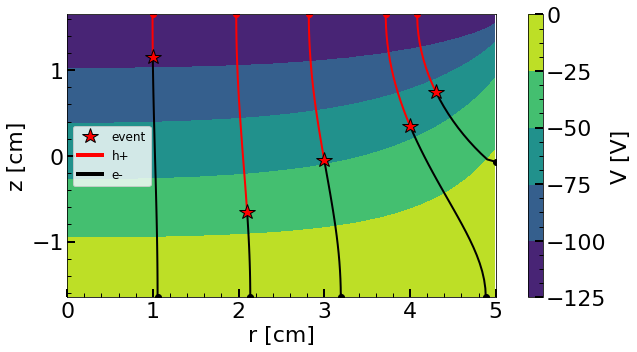

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
cb=ax.contourf(Yi,Zi,Vi, np.linspace(-125,0,6))
plt.colorbar(cb,label='V [V]')

'''for y,z,ye,ze in zip(ys_up,zs_up,ys_up_end,zs_up_end):
    ax.plot(y,z,'-k')
    ax.plot(ye,ze,'ok')

for y,z,ye,ze in zip(ys_down,zs_down,ys_down_end,zs_down_end):
    ax.plot(y,z,'-r')
    ax.plot(ye,ze,'or')
'''
for index in [1410, 521, 830, 1040, 1243]:
    ax.plot(ys_up[index],zs_up[index],'-r')
    ax.plot(ys_up_end[index],zs_up_end[index],'or')
    
    ax.plot(ys_down[index],zs_down[index],'-k')
    ax.plot(ys_down_end[index],zs_down_end[index],'ok')
    
    star=ax.plot(ys_up[index][0],zs_up[index][0],'*',markersize=16, markerfacecolor='r',markeredgecolor='k',label='event')

ax.set_xlim(0,R)
ax.set_ylim(-h/2,h/2)

ax.set_xlabel('r [cm]')
ax.set_ylabel('z [cm]')

from matplotlib.lines import Line2D
legend_elements = [star[0],
                   Line2D([0], [0], color='r', lw=4, label='h+'),
                   Line2D([0], [0], color='k', lw=4, label='e-'),]

ax.legend(handles=legend_elements, loc='center left',fontsize='large')
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('figures/transport_sim.png')

In [36]:
dVi_ode=np.array([interp_V(yue,zue)-interp_V(yde,zde) for yue,zue,yde,zde in zip(ys_up_end,zs_up_end,ys_down_end,zs_down_end)])

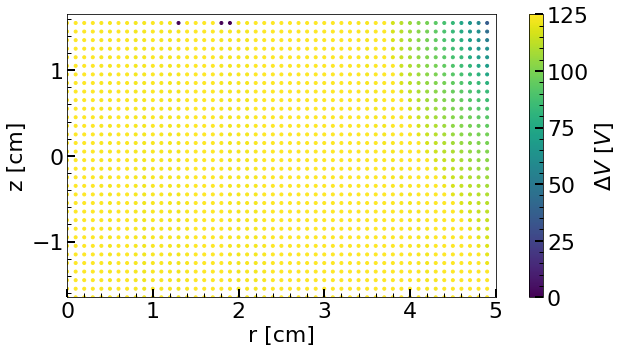

In [390]:
fig, ax = plt.subplots(figsize=(10,5))

shape=(len(zi_ode),len(yi_ode))
a=ax.scatter(Yi_ode,Zi_ode,c=np.abs(dVi_ode),marker='.',vmin=0,vmax=125)

plt.colorbar(a,ticks=[0,25,50,75,100,125],label=r'$\Delta V~[V]$')

ax.set_xlim(0,R)
ax.set_ylim(-h/2,h/2)

ax.set_xlabel('r [cm]')
ax.set_ylabel('z [cm]')
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('figures/dV_map.png')

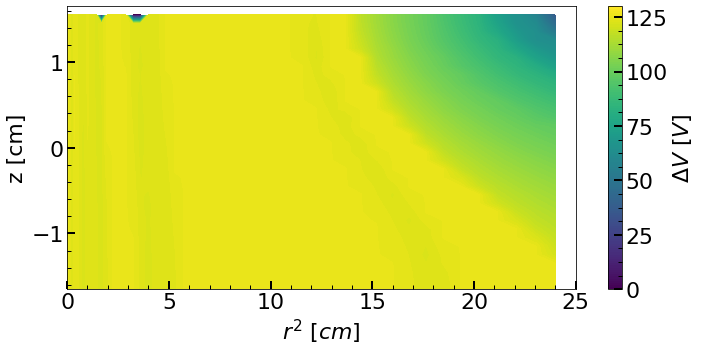

In [389]:
fig, ax = plt.subplots(figsize=(10,5))

shape=(len(zi_ode),len(yi_ode))
a=plt.contourf(Yi_ode.reshape(shape)**2,Zi_ode.reshape(shape),np.abs(dVi_ode.reshape(shape)),levels=np.linspace(0,130,130))

plt.colorbar(a,ticks=[0,25,50,75,100,125],label=r'$\Delta V~[V]$')

ax.set_xlim(0,R**2)
ax.set_ylim(-h/2,h/2)

ax.set_xlabel(r'$r^2~[cm]$')
ax.set_ylabel('z [cm]')

plt.tight_layout()

Alright, so how do ERs and NRs get reduced by this effect? They should each be reduced by the ratio of the true NTL gain to the nominal one.

\begin{equation}
    Reduction~Factor =f_R= \frac{G_{NTL}(\Delta V)}{G_{NTL}(V_{Bias})}
\end{equation}
 
So $f_R~1$ means little distortion and $f_R<1$ means more distortion. This works a little differently for ER and NR, but for the purposes of just characterizing the statistical uncertainty associated with including this effect, we can make the following argument.

If $Y<1$ and $\Delta V<V_{Bias}$ then it follows that

\begin{equation}
    \frac{1+Y\Delta V/\varepsilon}{1+YV_{Bias}/\varepsilon} > \frac{1+\Delta V/\varepsilon}{1+V_{Bias}/\varepsilon} > \Delta V/V
\end{equation}

This means that $f_{R,NR}>f_{R,ER}>\Delta V /V$. So reducing NRs by the $G_{NTL}$ ratio for ERs distorts them more than is needed. This makes it a conservative estimate of the size of the smearing effect. If we want to include this as a permanent correction, however we'll have to treat it more carefully.

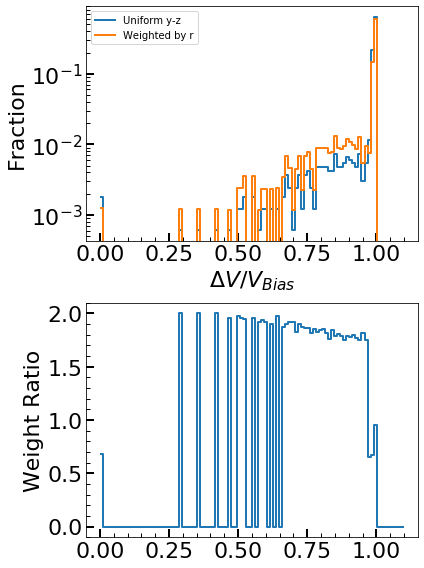

In [300]:
fig,ax = plt.subplots(2, figsize=(6, 8))
bins=np.linspace(0,1.1,101)
dbin=bins[1]-bins[0]
bctr=(bins[:-1]+bins[1:])/2

#GNTL_ratio=(1+np.abs(dVi_ode)/eps)/(1+np.abs(V)/eps)
#hflat,_=np.histogram(GNTL_ratio,bins=bins, density=True)
#hvol,_=np.histogram(GNTL_ratio,weights=np.abs(Yi_ode),bins=bins, density=True)

hflat,_=np.histogram(np.abs(dVi_ode/V),bins=bins, density=True)
hvol,_=np.histogram(np.abs(dVi_ode/V),weights=np.abs(Yi_ode),bins=bins, density=True)


ax[0].step(bctr,hflat*dbin,label='Uniform y-z', where='mid');
ax[0].step(bctr,hvol*dbin,label='Weighted by r', where='mid');

ax[0].set_yscale('log')

#ax[0].set_xlabel(r'$G_{NTL}(\Delta V)/G_{NTL}(V_{Bias})$')
ax[0].set_xlabel(r'$\Delta V/V_{Bias}$')
ax[0].set_ylabel('Fraction')


ax[0].legend()

ratio=np.zeros_like(hvol)
ratio[hflat!=0]=hvol[hflat!=0]/hflat[hflat!=0]
ax[1].step(bctr,ratio,label='Ratio', where='mid');

#ax[1].set_xlabel(r'$G_{NTL}(\Delta V)/G_{NTL}(V_{Bias})$')
ax[0].set_xlabel(r'$\Delta V/V_{Bias}$')
ax[1].set_ylabel('Weight Ratio')

#ax[1].legend()

plt.tight_layout()

[0.2394063079777371,
 0.2469264069264074,
 0.3942362399505259,
 1.0000000000000002,
 1.0000000000000002]

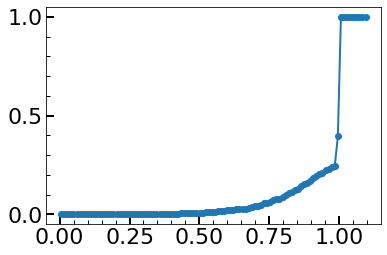

In [290]:
cdf=[np.sum(hvol[:i])/np.sum(hvol) for i in np.arange(len(bctr))]
plt.plot(bctr,cdf,'-o')
cdf[-12:-7]

In [386]:
import scipy

def fexp(x,x0,A,B):
    return (x<x0)*A*np.exp(B*(x-x0)/x0)

p0=(1e-2, 0.5)
ifit=((bctr<0.98) & (bctr>0.05))#Leave out the lowest bin, those are the low V artifacts
popt,perr=scipy.optimize.curve_fit(lambda x,A,B: fexp(x,1,A,B),  bctr[ifit], hvol[ifit]*dbin,  p0=p0 )
print(popt)
'''A,B=array([0.01369576, 4.20823831])'''

[0.01369576 4.20823831]


'A,B=array([0.01369576, 4.20823831])'

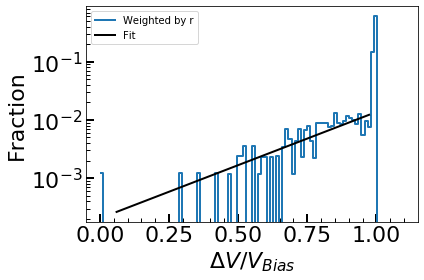

In [455]:
fig,ax = plt.subplots()

ax.step(bctr,hvol*dbin,label='Weighted by r', where='mid');

ax.plot(bctr[ifit],fexp(bctr[ifit],1,*popt),'k', label='Fit')

#ax.arrow(1,0,0,1, width=0.5e-2, head_width=3e-2, head_length=5e-1, color='k')

ax.set_yscale('log')
#ax.set_ylim(1e-4,2)

#ax.set_xlabel(r'$G_{NTL}(\Delta V)/G_{NTL}(V_{Bias})$')
ax.set_xlabel(r'$\Delta V/V_{Bias}$')
ax.set_ylabel('Fraction')


ax.legend()

plt.tight_layout()
plt.savefig('figures/dV_hist_fit.png')

(0, 2)

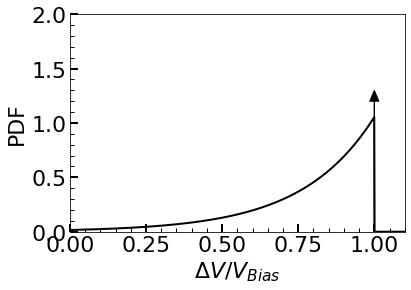

In [358]:
#We'll represent the PDF with a delta function at 1 and an exponential tail
#Given the CDF above, we have 75% of events in the delta function and 25% in the tail.
#So the delta is multiplied by 0.75 and the tail should integrate (from 0 to 1) to 0.25
#With the exponential of the form A*exp((x-1)/B), this means we should use 1/A=0.244/(B(1-exp(-1/B)))
fpeak=0.753
x0=1
B=popt[1]
A=(B/x0)*(1-fpeak)/(1-np.exp(-B))

#def pdf_fit(x,x0,A,B):
#    return (x<x0)*A*np.exp(B*(x-x0)/x0)#+(x==1)*0.75

fig,ax = plt.subplots()
xx=np.linspace(0,1.1,1000)
dxx=xx[1]-xx[0]
ax.plot(xx,fexp(xx,x0,A,B),'k')
ax.arrow(1,0,0,1.2, head_width=3e-2, head_length=1e-1, color='k')

#ax.set_xlabel(r'$G_{NTL}(\Delta V)/G_{NTL}(V_{Bias})$')
ax.set_xlabel(r'$\Delta V/V_{Bias}$')
ax.set_ylabel('PDF')

ax.set_xlim(0,1.1)
ax.set_ylim(0,2)

In [418]:
#How does this smear a spectrum?
#Take 1 event at 1 eV

#Integral of exponential pdf function above
#bins: bin edges to integrate between
#x0: value at peak whcih we want to smear down
#fpeak: fraction of events in the delta function peak
#B: fall rate [unitless]
def pdfint(bins,x0,fpeak,B):
    
    bounds=bins.copy()
    #Integration bounds are (0,x0)
    bounds[bounds>x0]=x0
    bounds[bounds<0]=0
    
    #Calulate these just once for speed
    expo=np.exp(B*(bounds-x0)/x0)
    below_x0=bins<x0
    
    return ((1-fpeak)/(1-np.exp(-B)))*(expo[1:] - expo[:-1]) + (below_x0[:-1] & ~below_x0[1:])*fpeak

#handle broadcasting x0 by bins
def pdfint_v2(x0,fpeak,B,bins):
    
    arg=B*(bins-x0)/x0

    #Integration bounds are (0,x0)
    arg[bins>x0]=0
    arg[bins<np.zeros_like(x0)]=-B
    
    #Calulate just once for speed
    below_x0=bins<x0
    
    return ((1-fpeak)/(1-np.exp(-B)))*(np.exp(arg[:,1:]) - np.exp(arg[:,:-1])) + (below_x0[:,:-1] & ~below_x0[:,1:])*fpeak

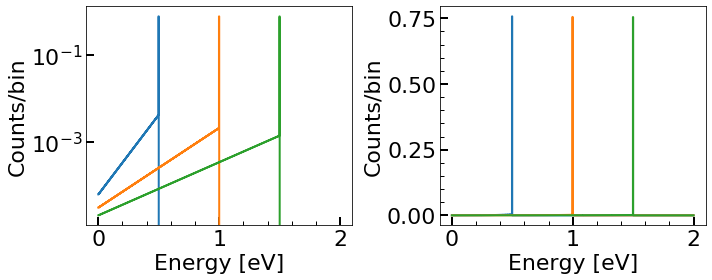

In [393]:
fig,ax = plt.subplots(1,2, figsize=(10,4))

bb=np.linspace(0,2,1001)
bbctr=(bb[:-1]+bb[1:])/2

for axi in ax:
    axi.step(bbctr,pdfint(bb,0.5,fpeak,B),where='mid')
    axi.step(bbctr,pdfint(bb,1,fpeak,B),where='mid')
    #axi.step(bbctr,2*pdfint(bb,1,fpeak,B),where='mid')
    axi.step(bbctr,pdfint(bb,1.5,fpeak,B),where='mid')
    
    axi.set_xlabel(r'Energy [eV]')
    axi.set_ylabel(r'Counts/bin')
    
ax[0].set_yscale('log')
ax[1].set_yscale('linear')
#ax[1].set_ylim(0,1e-2)

plt.tight_layout()
plt.savefig('figures/dV_smear_effect_eg.png')

In [378]:
np.sum(pdfint(bb,1.5,A,B))

1.0000000000000002

In [444]:
kernel=pdfint_v2(bbctr[:,np.newaxis],1,B,bb)
print(bb.shape,bbctr.shape,kernel.shape)

(1001,) (1000,) (1000, 1000)


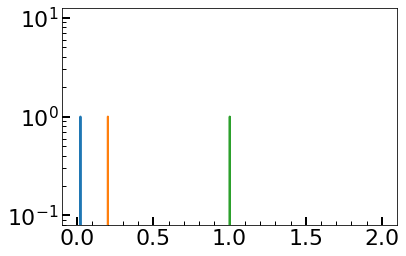

In [445]:
plt.plot(bbctr,kernel[10]);
plt.plot(bbctr,kernel[100]);
plt.plot(bbctr,kernel[500]);
plt.gca().set_yscale('log')

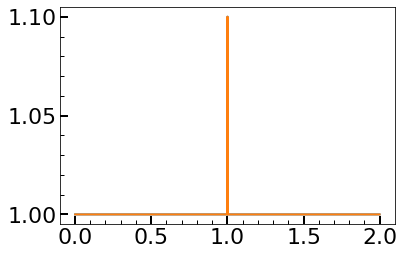

In [446]:
spectrum=np.ones_like(bbctr)
spectrum[500]=1.1
sums=np.sum(kernel*spectrum,0)
plt.step(bbctr,spectrum,where='mid')
plt.step(bbctr,sums,where='mid')

1.0000000000000002